# Importing Modules

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 'bold'
plt.style.use('dark_background')
import seaborn as sns

# Needed Functions


In [3]:
def add_labels_group_data(x,y,method):

    if x == 'team':
        for i in range(5):
            plt.text(i, group_data.groupby(x).agg({y:method}).sort_values(by=y,ascending=False)[:5].iloc[i][0] + 0.10,
            group_data.groupby(x).agg({y:method}).sort_values(by=y,ascending=False)[:5].iloc[i][0],
            ha = 'center')
    elif x=='group':
        for i in range(8):
            plt.text(i, group_data.groupby(x).agg({y:method}).sort_values(by=y,ascending=False).iloc[i][0] + 0.10,
            group_data.groupby(x).agg({y:method}).sort_values(by=y,ascending=False).iloc[i][0],
            ha = 'center')

In [4]:
def add_labels_team_data(x,y,method):
        for i in range(5):
            plt.text(i, team_data.groupby(x).agg({y:method}).sort_values(by=y,ascending=False)[:5].iloc[i][0] + 0.11,
            team_data.groupby(x).agg({y:method}).sort_values(by=y,ascending=False)[:5].iloc[i][0],
            ha = 'center')

# Loading Group Stage Data

In [5]:
group_data = pd.read_csv('group_stats.csv')
group_data.head()

,Unnamed: 0,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,0,1,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,1,1,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,2,1,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39
3,3,1,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71
4,4,2,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97


In [6]:
rows = group_data.shape[0]
cols = group_data.shape[1]

In [7]:
rows

32

In [8]:
cols

16

In [9]:
#checking column names
group_data.columns

Index(['Unnamed: 0', 'group', 'rank', 'team', 'matches_played', 'wins',
       'draws', 'losses', 'goals_scored', 'goals_against', 'goal_difference',
       'points', 'expected_goal_scored', 'exp_goal_conceded',
       'exp_goal_difference', 'exp_goal_difference_per_90'],
      dtype='object')

In [10]:
# Dropping Unnamed:0 column as it is useless.
group_data.drop('Unnamed: 0',axis = 1, inplace = True)

In [11]:
# Checking For Null values.
group_data.isnull().sum()

group                         0
rank                          0
team                          0
matches_played                0
wins                          0
draws                         0
losses                        0
goals_scored                  0
goals_against                 0
goal_difference               0
points                        0
expected_goal_scored          0
exp_goal_conceded             0
exp_goal_difference           0
exp_goal_difference_per_90    0
dtype: int64

In [12]:
# Renaming the values in "group" column
group_data['group'] = group_data['group'].replace([1,2,3,4,5,6,7,8],['A','B','C','D','E','F','G','H'])

In [13]:
group_data

,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90
0,A,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11
1,A,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43
2,A,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39
3,A,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71
4,B,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97
5,B,2,United States,3,1,2,0,2,1,1,5,2.6,2.7,-0.1,-0.03
6,B,3,IR Iran,3,1,0,2,4,7,-3,3,3.2,4.2,-0.9,-0.32
7,B,4,Wales,3,0,1,2,1,6,-5,1,2.7,4.6,-1.9,-0.63
8,C,1,Argentina,3,2,0,1,5,2,3,6,6.0,0.7,5.2,1.74
9,C,2,Poland,3,1,1,1,2,2,0,4,2.8,5.9,-3.1,-1.04


In [14]:
# Creating lists of each region and its teams
teams = list(group_data['team'].values)
african_teams = ['Senegal','Cameroon','Tunisia','Ghana','Morocco']
asian_teams = ['Qatar','Japan','Korea Republic','Australia','IR Iran','Saudi Arabia']
american_teams = ['Ecuador','Mexico','Argentina','Brazil','Uruguay','Canada','Costa Rica', 'United States']
european_teams = list(set(group_data['team'].values)-set(african_teams)-set(asian_teams)-set(american_teams))

In [15]:
# Creating the 'Region' Column
for i in range(32):
    if teams[i] in african_teams:
        group_data.loc[i,'Region'] = 'Africa'
    elif teams[i] in asian_teams:
        group_data.loc[i,'Region'] = 'Asia'
    elif teams[i] in american_teams:
        group_data.loc[i,'Region'] = 'America'
    else:
        group_data.loc[i,'Region'] = 'Europe' 

In [16]:
group_data.head()

,group,rank,team,matches_played,wins,draws,losses,goals_scored,goals_against,goal_difference,points,expected_goal_scored,exp_goal_conceded,exp_goal_difference,exp_goal_difference_per_90,Region
0,A,1,Netherlands,3,2,1,0,5,1,4,7,2.4,2.7,-0.3,-0.11,Europe
1,A,2,Senegal,3,2,0,1,5,4,1,6,3.8,2.5,1.3,0.43,Africa
2,A,3,Ecuador,3,1,1,1,4,3,1,4,3.7,2.6,1.2,0.39,America
3,A,4,Qatar,3,0,0,3,1,7,-6,0,1.4,3.5,-2.1,-0.71,Asia
4,B,1,England,3,2,1,0,9,2,7,7,5.2,2.3,2.9,0.97,Europe


# Group Stage Analysis

Text(0, 0.5, 'Goals Scored')

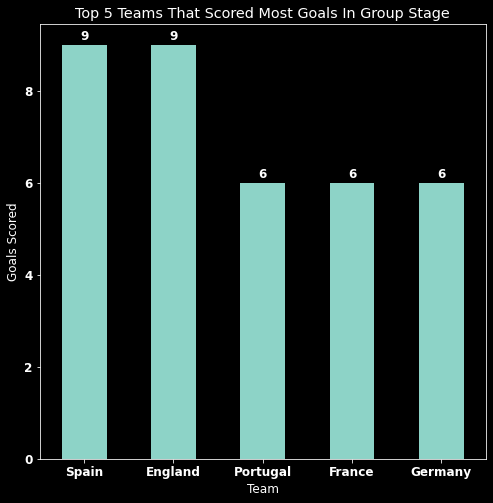

In [17]:
group_data.groupby('team').agg({'goals_scored':'sum'}).sort_values(by='goals_scored',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('team','goals_scored','sum')

plt.title('Top 5 Teams That Scored Most Goals In Group Stage')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Conceded')

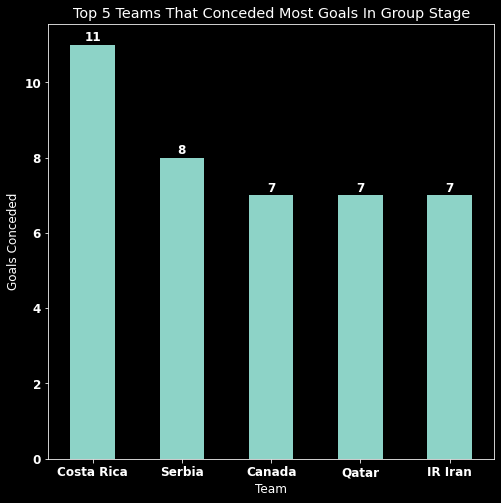

In [19]:
group_data.groupby('team').agg({'goals_against':'sum'}).sort_values(by='goals_against',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('team','goals_against','sum')

plt.title('Top 5 Teams That Conceded Most Goals In Group Stage')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Goals Conceded')

Text(0, 0.5, 'Goal Difference')

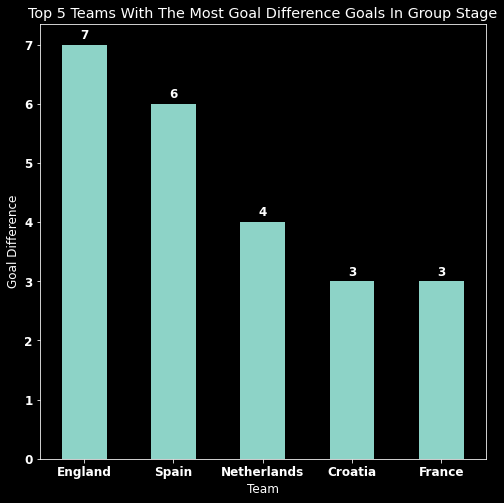

In [23]:
group_data.groupby('team').agg({'goal_difference':'sum'}).sort_values(by='goal_difference',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('team','goal_difference','sum')

plt.title('Top 5 Teams With The Most Goal Difference Goals In Group Stage')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Goal Difference')

Text(0, 0.5, 'Expected Goals')

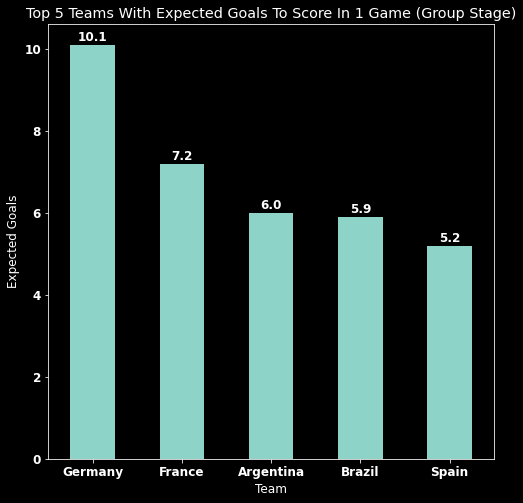

In [26]:
group_data.groupby('team').agg({'expected_goal_scored':'sum'}).sort_values(by='expected_goal_scored',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('team','expected_goal_scored','sum')

plt.title('Top 5 Teams With Expected Goals To Score In 1 Game (Group Stage)')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Expected Goals')

Text(0, 0.5, 'Expected Goals')

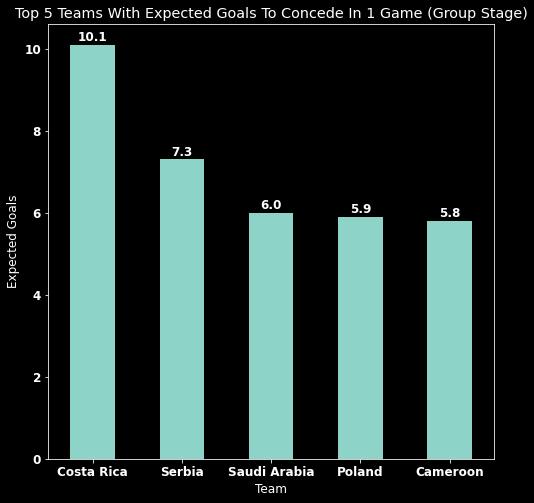

In [32]:
group_data.groupby('team').agg({'exp_goal_conceded':'sum'}).sort_values(by='exp_goal_conceded',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('team','exp_goal_conceded','sum')

plt.title('Top 5 Teams With Expected Goals To Concede In 1 Game (Group Stage)')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Expected Goals')

Text(0, 0.5, 'Goals Scored')

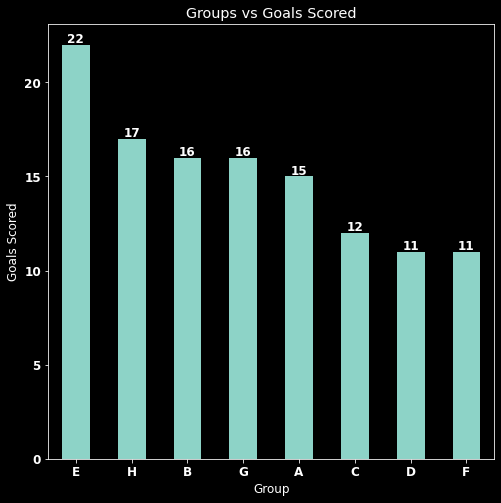

In [33]:
group_data.groupby('group').agg({'goals_scored':'sum'}).sort_values(by='goals_scored',ascending=False).plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('group','goals_scored','sum')

plt.title('Groups vs Goals Scored')
plt.xlabel('Group')
plt.xticks(rotation='horizontal')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Scored')

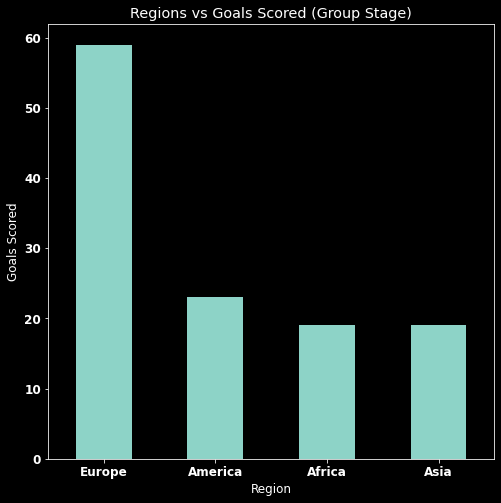

In [34]:
group_data.groupby('Region').agg({'goals_scored':'sum'}).sort_values(by='goals_scored',ascending=False).plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('Region','goals_scored','sum')

plt.title('Regions vs Goals Scored (Group Stage)')
plt.xlabel('Region')
plt.xticks(rotation='horizontal')
plt.ylabel('Goals Scored')

Text(0, 0.5, 'Goals Conceded')

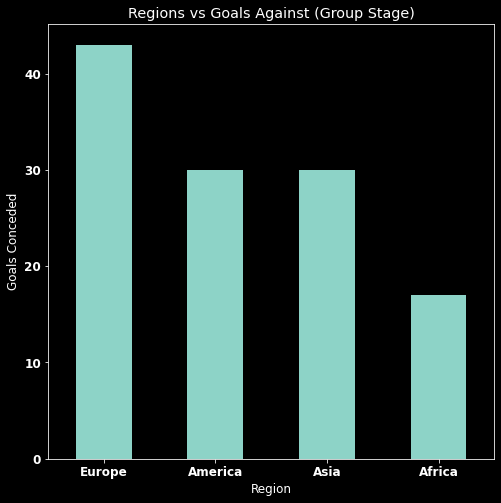

In [35]:
group_data.groupby('Region').agg({'goals_against':'sum'}).sort_values(by='goals_against',ascending=False).plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('Region','goals_against','mean')

plt.title('Regions vs Goals Against (Group Stage)')
plt.xlabel('Region')
plt.xticks(rotation='horizontal')
plt.ylabel('Goals Conceded')

Text(0, 0.5, 'Average of Expected Goals to Score')

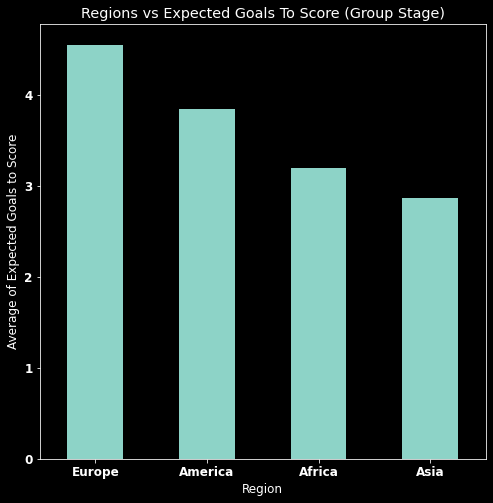

In [36]:
group_data.groupby('Region').agg({'expected_goal_scored':'mean'}).sort_values(by='expected_goal_scored',ascending=False).plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('Region','expected_goal_scored','mean')

plt.title('Regions vs Expected Goals To Score (Group Stage)')
plt.xlabel('Region')
plt.xticks(rotation='horizontal')
plt.ylabel('Average of Expected Goals to Score')

Text(0, 0.5, 'Average of Expected Goals to Concede')

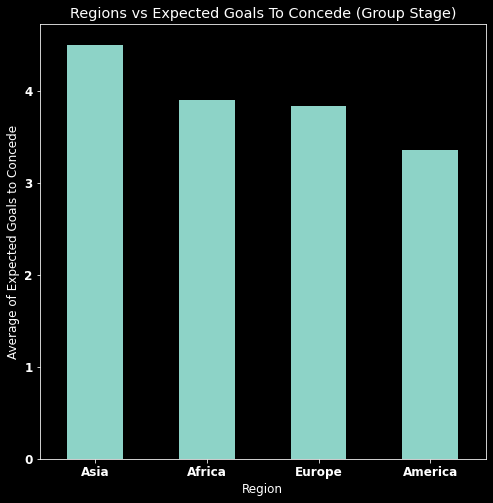

In [37]:
group_data.groupby('Region').agg({'exp_goal_conceded':'mean'}).sort_values(by='exp_goal_conceded',ascending=False).plot(figsize=(8,8),kind='bar',legend=False)

add_labels_group_data('Region','exp_goal_conceded','mean')

plt.title('Regions vs Expected Goals To Concede (Group Stage)')
plt.xlabel('Region')
plt.xticks(rotation='horizontal')
plt.ylabel('Average of Expected Goals to Concede')

# Loading Team Data

In [39]:
team_data = pd.read_csv('team_data.csv')
team_data.head()

,team,players_used,avg_age,possession,games,games_starts,minutes,minutes_90s,goals,assists,...,fouls,fouled,offsides,pens_won,pens_conceded,own_goals,ball_recoveries,aerials_won,aerials_lost,aerials_won_pct
0,Argentina,24,28.4,57.4,7,77,690,7.7,15,8,...,100,115,23,5,2,1,357,83,90,48.0
1,Australia,20,28.7,37.8,4,44,360,4.0,3,3,...,52,34,1,0,0,0,200,72,72,50.0
2,Belgium,20,30.6,57.0,3,33,270,3.0,1,1,...,30,35,3,0,1,0,132,33,28,54.1
3,Brazil,26,28.5,56.2,5,55,480,5.3,8,6,...,63,74,8,1,0,0,271,43,56,43.4
4,Cameroon,22,28.0,41.7,3,33,270,3.0,4,4,...,32,38,2,0,0,0,142,42,36,53.8


In [55]:
row=team_data.shape[0]
rows

32

In [57]:
cols=team_data.shape[1]
cols

189

In [58]:
team_data.columns.to_list()

['team',
 'players_used',
 'avg_age',
 'possession',
 'games',
 'games_starts',
 'minutes',
 'minutes_90s',
 'goals',
 'assists',
 'goals_pens',
 'pens_made',
 'pens_att',
 'cards_yellow',
 'cards_red',
 'goals_per90',
 'assists_per90',
 'goals_assists_per90',
 'goals_pens_per90',
 'goals_assists_pens_per90',
 'xg',
 'npxg',
 'xg_assist',
 'npxg_xg_assist',
 'xg_per90',
 'xg_assist_per90',
 'xg_xg_assist_per90',
 'npxg_per90',
 'npxg_xg_assist_per90',
 'gk_games',
 'gk_games_starts',
 'gk_minutes',
 'gk_goals_against',
 'gk_goals_against_per90',
 'gk_shots_on_target_against',
 'gk_saves',
 'gk_save_pct',
 'gk_wins',
 'gk_ties',
 'gk_losses',
 'gk_clean_sheets',
 'gk_clean_sheets_pct',
 'gk_pens_att',
 'gk_pens_allowed',
 'gk_pens_saved',
 'gk_pens_missed',
 'gk_pens_save_pct',
 'gk_free_kick_goals_against',
 'gk_corner_kick_goals_against',
 'gk_own_goals_against',
 'gk_psxg',
 'gk_psnpxg_per_shot_on_target_against',
 'gk_psxg_net',
 'gk_psxg_net_per90',
 'gk_passes_completed_launched',

# Team Data Analysis

Text(0, 0.5, 'Number of Players Used')

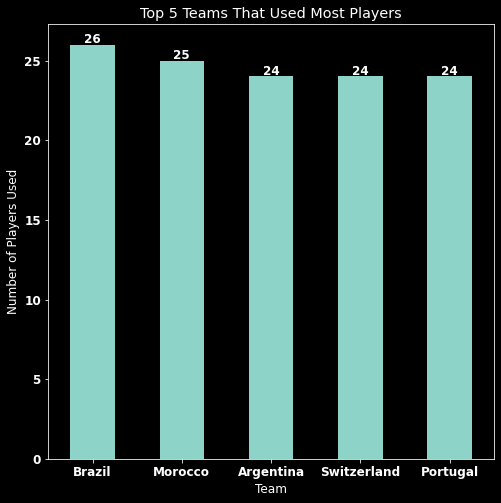

In [59]:
team_data.groupby('team').agg({'players_used':'sum'}).sort_values(by='players_used',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','players_used','sum')

plt.title('Top 5 Teams That Used Most Players')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Players Used')

In [70]:
pd.DataFrame(team_data.groupby('team')['avg_age'].sum().sort_values()).reset_index().iloc[0]

team       United States
avg_age             25.4
Name: 0, dtype: object

In [71]:
pd.DataFrame(team_data.groupby('team')['avg_age'].sum().sort_values()).reset_index().iloc[-1]

team       Belgium
avg_age       30.6
Name: 31, dtype: object

Text(0, 0.5, 'Minutes')

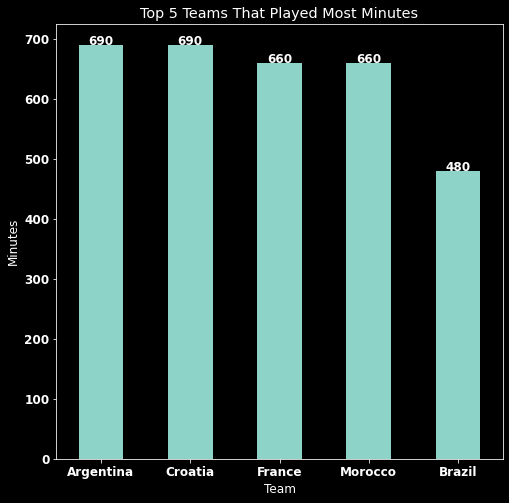

In [73]:
team_data.groupby('team').agg({'minutes':'sum'}).sort_values(by='minutes',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','minutes','sum')

plt.title('Top 5 Teams That Played Most Minutes')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Minutes')

Text(0.5, 0, 'Team')

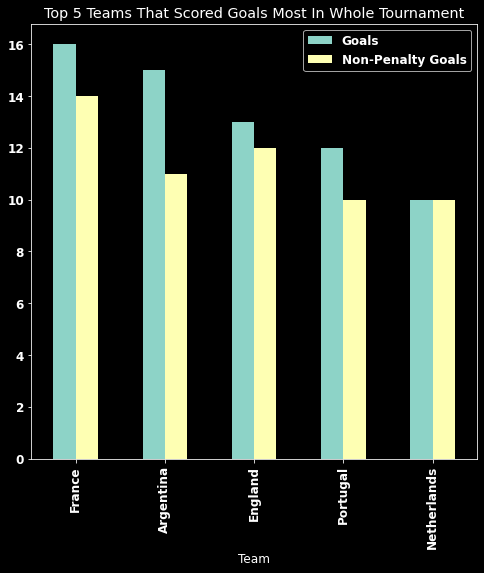

In [74]:
team_data.groupby('team').agg({'goals':'sum','goals_pens':'sum'}).sort_values(by='goals',ascending=False)[:5].plot(figsize=(8,8),kind='bar')
plt.legend(['Goals','Non-Penalty Goals'])
plt.title('Top 5 Teams That Scored Goals Most In Whole Tournament')
plt.xlabel('Team')

Text(0, 0.5, 'Goals')

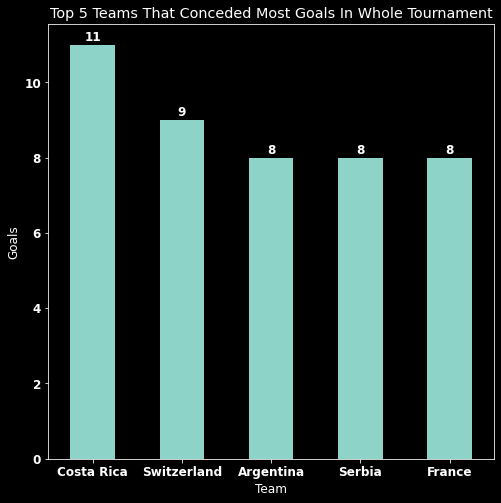

In [75]:
team_data.groupby('team').agg({'gk_goals_against':'sum'}).sort_values(by='gk_goals_against',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','gk_goals_against','sum')

plt.title('Top 5 Teams That Conceded Most Goals In Whole Tournament')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Goals')

Text(0, 0.5, 'Number Of Penalties')

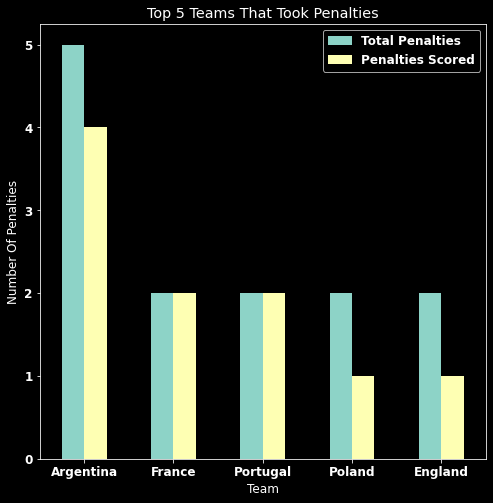

In [76]:
team_data.groupby('team').agg({'pens_att':'sum','pens_made':'sum'}).sort_values(by='pens_att',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

plt.legend(['Total Penalties','Penalties Scored'])
plt.title('Top 5 Teams That Took Penalties')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Penalties')

Text(0, 0.5, 'Number Of Cards')

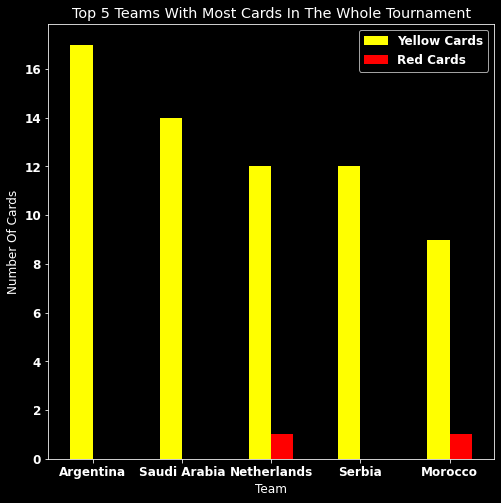

In [78]:
team_data.groupby('team').agg({'cards_yellow':'sum','cards_red':'sum'}).sort_values(by='cards_yellow',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False,color=['yellow','red'])

plt.legend(['Yellow Cards','Red Cards'])
plt.title('Top 5 Teams With Most Cards In The Whole Tournament')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Cards')

Text(0, 0.5, 'Number Of Clean Sheets')

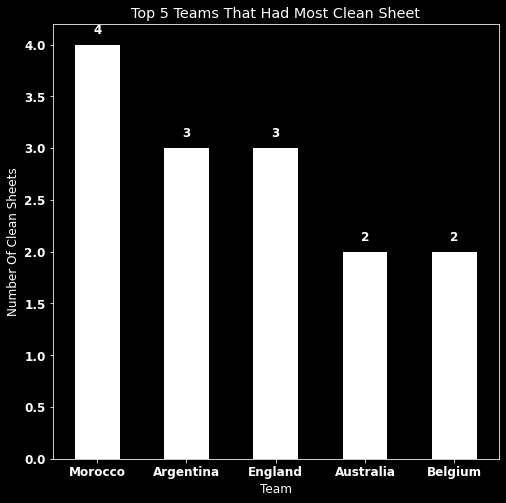

In [80]:
team_data.groupby('team').agg({'gk_clean_sheets':'sum'}).sort_values(by='gk_clean_sheets',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False,color=['White'])

add_labels_team_data('team','gk_clean_sheets','sum')

plt.title('Top 5 Teams That Had Most Clean Sheet')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Clean Sheets')

Text(0, 0.5, 'Number Of Penalties')

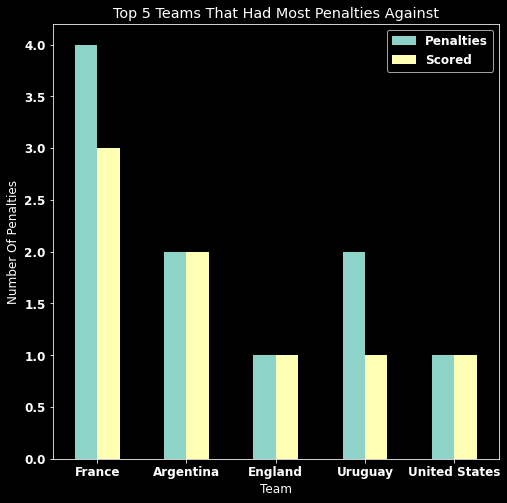

In [81]:
team_data.groupby('team').agg({'gk_pens_att':'sum','gk_pens_allowed':'sum'}).sort_values(by='gk_pens_allowed',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

plt.legend(['Penalties','Scored'])
plt.title('Top 5 Teams That Had Most Penalties Against')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Penalties')

Text(0, 0.5, 'Number of Goals')

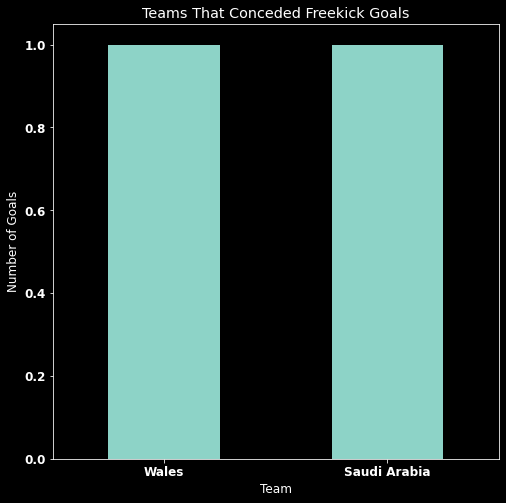

In [82]:
team_data.groupby('team').agg({'gk_free_kick_goals_against':'sum'}).sort_values(by='gk_free_kick_goals_against',ascending=False)[:2].plot(figsize=(8,8),kind='bar',legend=False)

plt.title('Teams That Conceded Freekick Goals')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Goals')

Text(0, 0.5, 'Number of Goals')

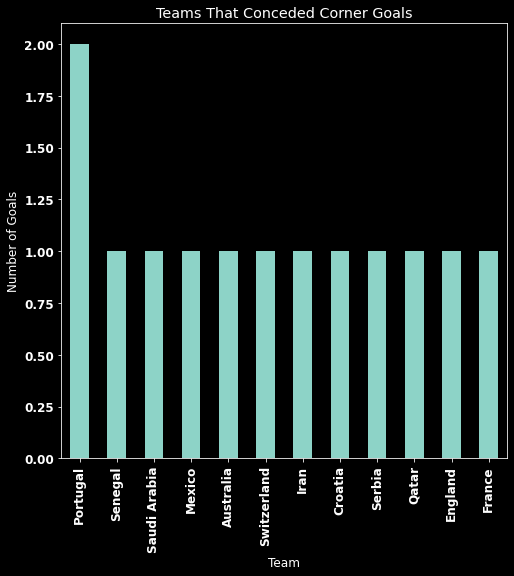

In [83]:
team_data.groupby('team').agg({'gk_corner_kick_goals_against':'sum'}).sort_values(by='gk_corner_kick_goals_against',ascending=False)[:12].plot(figsize=(8,8),kind='bar',legend=False)

plt.title('Teams That Conceded Corner Goals')
plt.xlabel('Team')
plt.xticks(rotation='vertical')
plt.ylabel('Number of Goals')

Text(0, 0.5, 'Number of Goals')

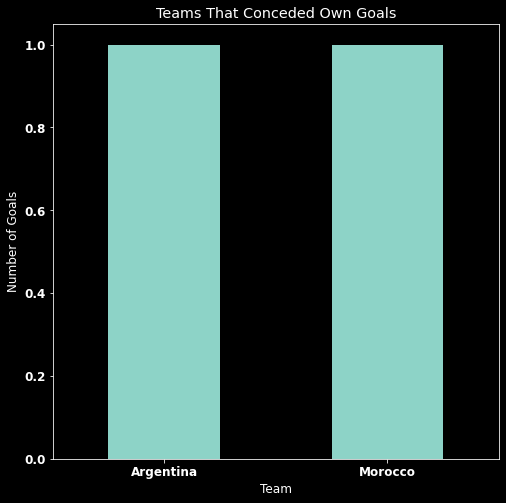

In [86]:
team_data.groupby('team').agg({'gk_own_goals_against':'sum'}).sort_values(by='gk_own_goals_against',ascending=False)[:2].plot(figsize=(8,8),kind='bar',legend=False)

plt.title('Teams That Conceded Own Goals')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number of Goals')

Text(0.5, 0, 'Team')

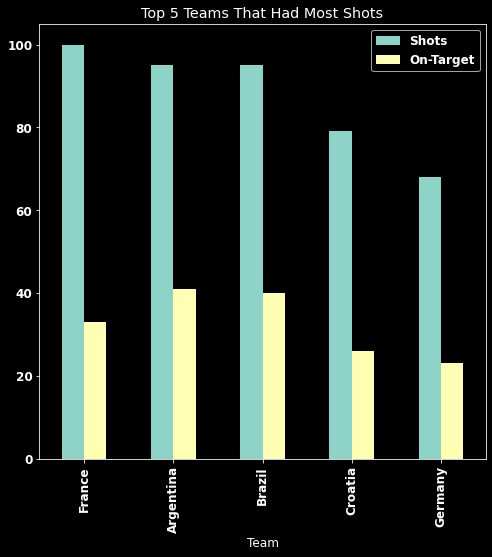

In [87]:
team_data.groupby('team').agg({'shots':'sum','shots_on_target':'sum'}).sort_values(by='shots',ascending=False)[:5].plot(figsize=(8,8),kind='bar')
plt.legend(['Shots','On-Target'])
plt.title('Top 5 Teams That Had Most Shots')
plt.xlabel('Team')

Text(0, 0.5, 'Number Of Free Kicks')

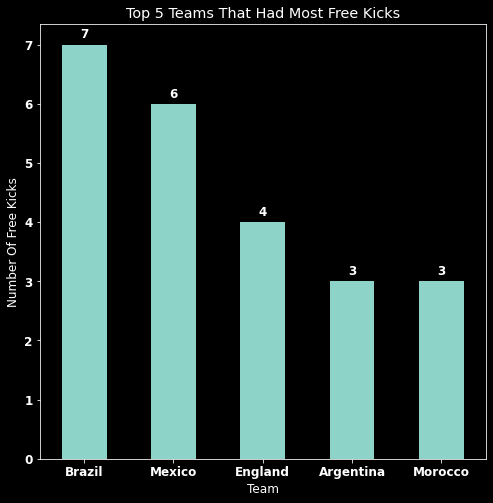

In [103]:
team_data.groupby('team').agg({'shots_free_kicks':'sum'}).sort_values(by='shots_free_kicks',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','shots_free_kicks','sum')

plt.title('Top 5 Teams That Had Most Free Kicks')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Free Kicks')

Text(0, 0.5, 'passes_completed')

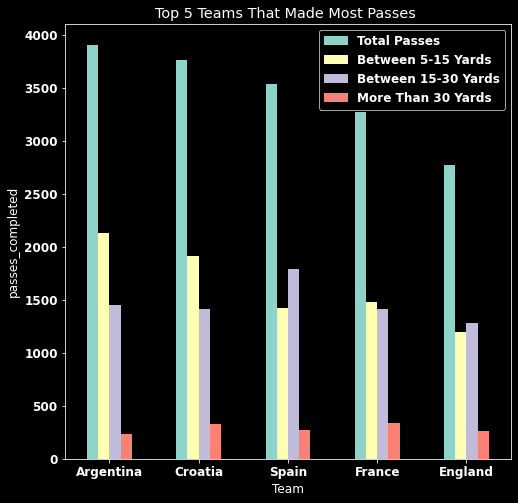

In [105]:
team_data.groupby('team').agg({'passes_completed':'sum','passes_completed_short':'sum','passes_completed_medium':'sum','passes_completed_long':'sum'}).sort_values(by='passes_completed',ascending=False)[:5].plot(figsize=(8,8),kind='bar')
plt.legend(['Total Passes','Between 5-15 Yards','Between 15-30 Yards','More Than 30 Yards'])
plt.title('Top 5 Teams That Made Most Passes ')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('passes_completed')

Text(0, 0.5, 'Number Of Passes')

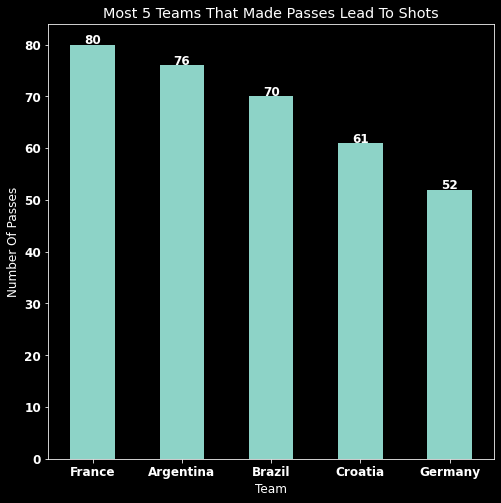

In [92]:
team_data.groupby('team').agg({'assisted_shots':'sum'}).sort_values(by='assisted_shots',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','assisted_shots','sum')

plt.title('Most 5 Teams That Made Passes Lead To Shots')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Passes')

Text(0, 0.5, 'Number Of Passes')

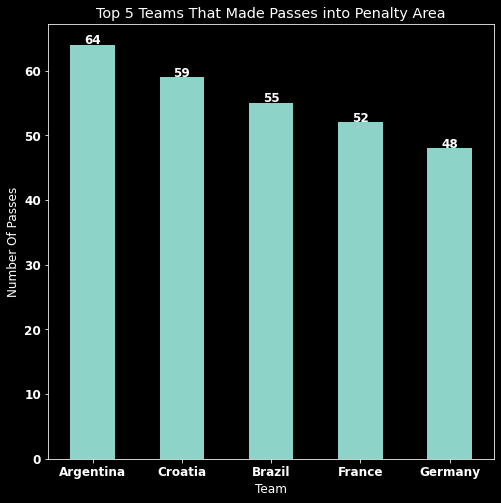

In [97]:
team_data.groupby('team').agg({'passes_into_penalty_area':'sum'}).sort_values(by='passes_into_penalty_area',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','passes_into_penalty_area','sum')

plt.title('Top 5 Teams That Made Passes into Penalty Area')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Passes')

Text(0, 0.5, 'Number Of Crosses')

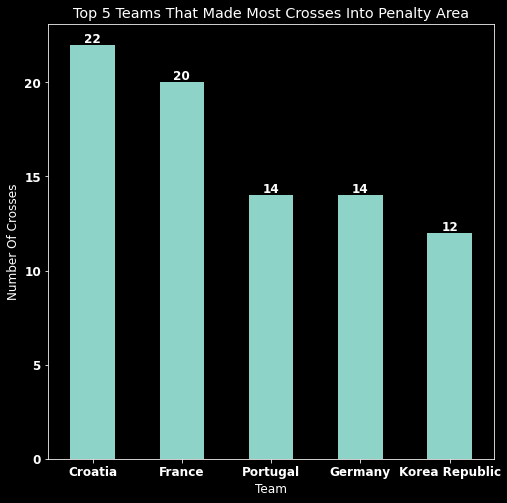

In [106]:
team_data.groupby('team').agg({'crosses_into_penalty_area':'sum'}).sort_values(by='crosses_into_penalty_area',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','crosses_into_penalty_area','sum')

plt.title('Top 5 Teams That Made Most Crosses Into Penalty Area')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Crosses')

Text(0, 0.5, 'Number Of Through Passes')

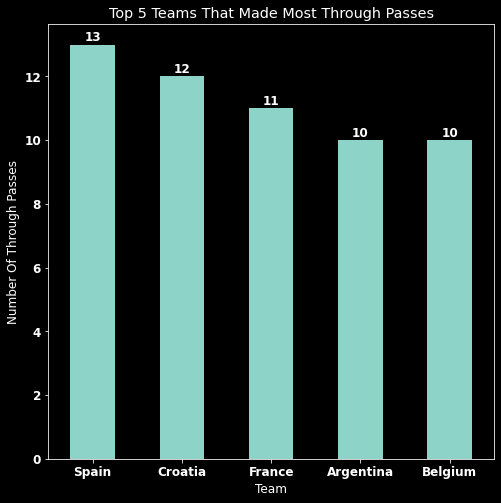

In [108]:
team_data.groupby('team').agg({'through_balls':'sum'}).sort_values(by='through_balls',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','through_balls','sum')

plt.title('Top 5 Teams That Made Most Through Passes')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Through Passes')

Text(0, 0.5, 'Number Of Crosses')

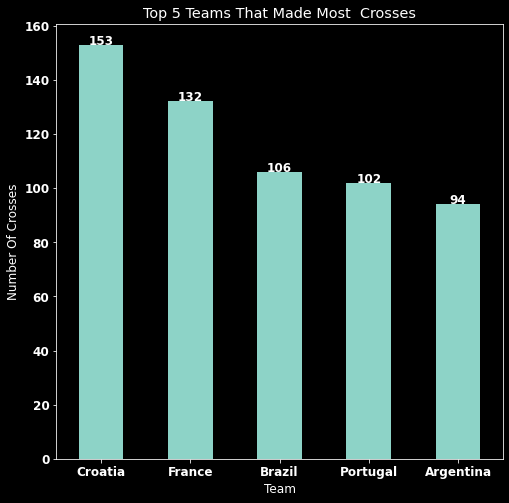

In [109]:
team_data.groupby('team').agg({'crosses':'sum'}).sort_values(by='crosses',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','crosses','sum')

plt.title('Top 5 Teams That Made Most  Crosses')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Crosses')

Text(0, 0.5, 'Number Of Throw-Ins')

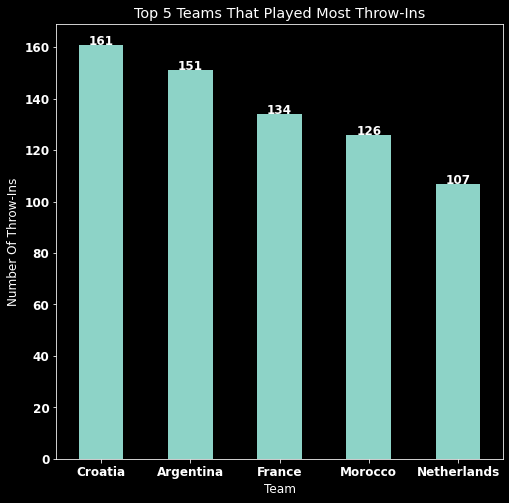

In [111]:
team_data.groupby('team').agg({'throw_ins':'sum'}).sort_values(by='throw_ins',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','throw_ins','sum')

plt.title('Top 5 Teams That Played Most Throw-Ins')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Throw-Ins')

Text(0.5, 0, 'Team')

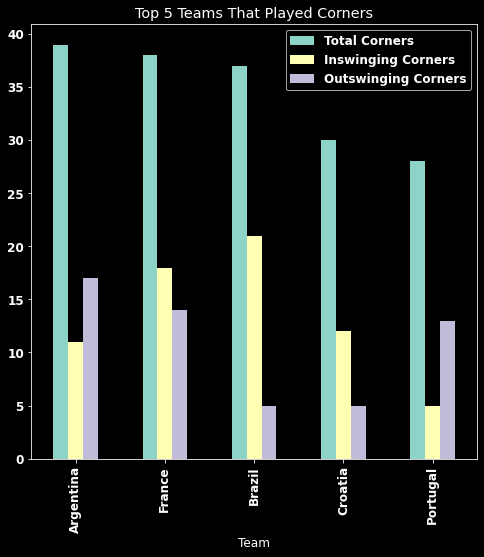

In [112]:
team_data.groupby('team').agg({'corner_kicks':'sum','corner_kicks_in':'sum','corner_kicks_out':'sum'}).sort_values(by='corner_kicks',ascending=False)[:5].plot(figsize=(8,8),kind='bar')
plt.legend(['Total Corners','Inswinging Corners','Outswinging Corners'])
plt.title('Top 5 Teams That Played Corners')
plt.xlabel('Team')

Text(0, 0.5, 'Number Of Offsides')

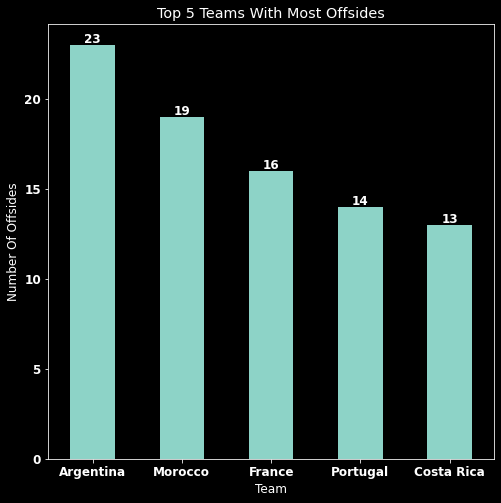

In [114]:
team_data.groupby('team').agg({'passes_offsides':'sum'}).sort_values(by='passes_offsides',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','passes_offsides','sum')

plt.title('Top 5 Teams With Most Offsides')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Offsides')

<ipython-input-121-057f64fd1552>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


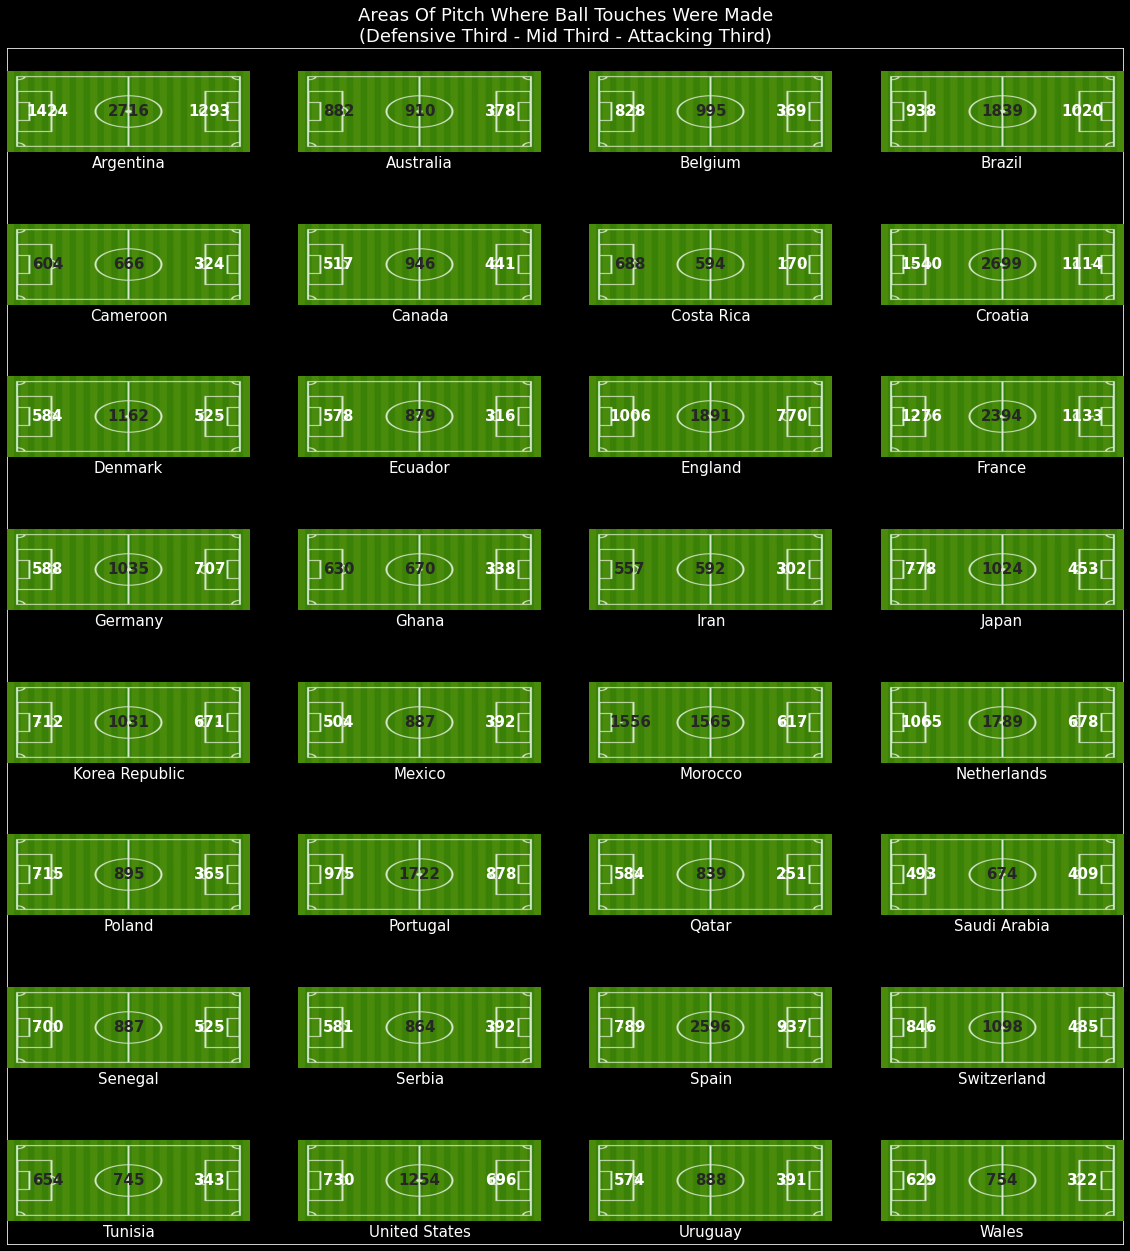

In [121]:
plt.rcParams['font.size'] = 15.0
plt.rcParams['font.weight'] = 'bold'

img = plt.imread("football_pitch.jpeg")
fig, axes = plt.subplots(figsize=(20,22))
axes.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.title('Areas Of Pitch Where Ball Touches Were Made\n(Defensive Third - Mid Third - Attacking Third)')

for i in range(32):
    fig.add_subplot(8,4,i+1)
    plt.imshow(img)
    hmax= sns.heatmap(pd.DataFrame(team_data[['touches_def_3rd','touches_mid_3rd','touches_att_3rd']].iloc[i]).T,annot=True,cbar=False,fmt='g')
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.xlabel(team_data['team'][i])
    hmax.imshow(img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1)

fig.show()

plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 'normal'

Text(0.5, 0, 'Team')

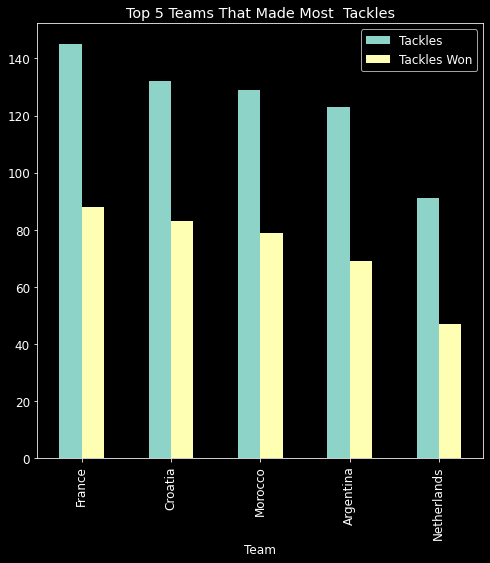

In [122]:
team_data.groupby('team').agg({'tackles':'sum','tackles_won':'sum'}).sort_values(by='tackles',ascending=False)[:5].plot(figsize=(8,8),kind='bar')
plt.legend(['Tackles','Tackles Won'])
plt.title('Top 5 Teams That Made Most  Tackles')
plt.xlabel('Team')

<ipython-input-124-63acd309670a>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


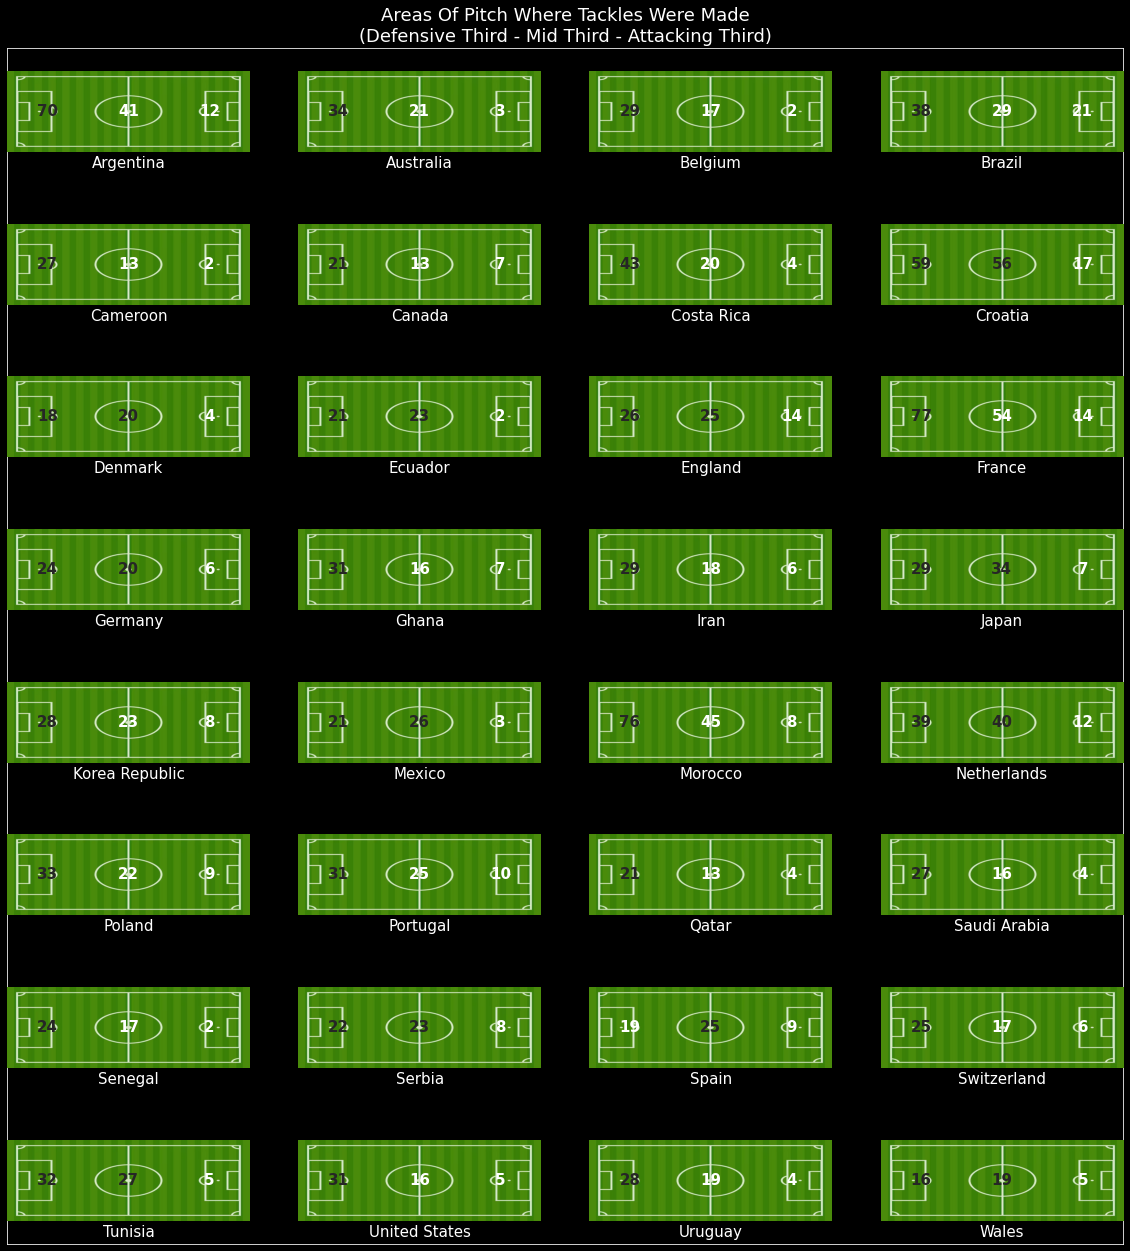

In [124]:
plt.rcParams['font.size'] = 15.0
plt.rcParams['font.weight'] = 'bold'

img = plt.imread("football_pitch.jpeg")

fig, axes = plt.subplots(figsize=(20,22))
axes.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
plt.title('Areas Of Pitch Where Tackles Were Made\n(Defensive Third - Mid Third - Attacking Third)')

for i in range(32):
    fig.add_subplot(8,4,i+1)
    plt.imshow(img)
    hmax= sns.heatmap(pd.DataFrame(team_data[['tackles_def_3rd','tackles_mid_3rd','tackles_att_3rd']].iloc[i]).T,annot=True,cbar=False)
    plt.tick_params(left = False, right = False , labelleft = False, labelbottom = False, bottom = False)
    plt.xlabel(team_data['team'][i])
    hmax.imshow(img,
          aspect = hmax.get_aspect(),
          extent = hmax.get_xlim() + hmax.get_ylim(),
          zorder = 1)

fig.show()

plt.rcParams['font.size'] = 12.0
plt.rcParams['font.weight'] = 'normal'

Text(0, 0.5, 'Number Of Dribbles')

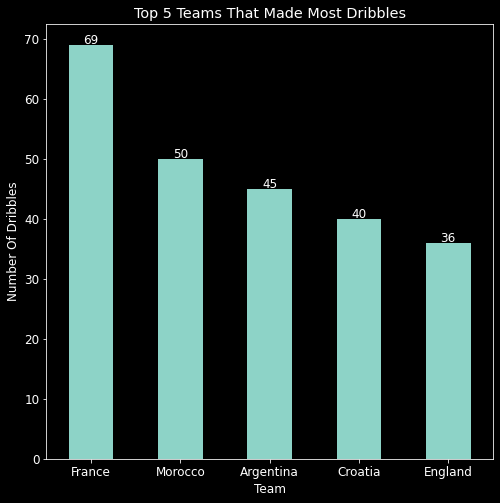

In [125]:
team_data.groupby('team').agg({'dribbles_completed':'sum'}).sort_values(by='dribbles_completed',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','dribbles_completed','sum')

plt.title('Top 5 Teams That Made Most Dribbles')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Dribbles')

Text(0, 0.5, 'Number Of Times Ball Lost')

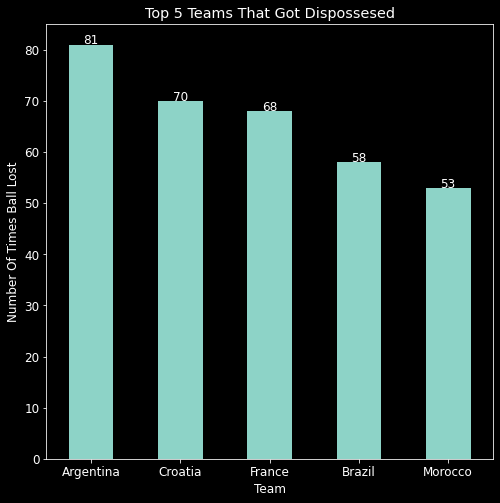

In [128]:
team_data.groupby('team').agg({'dispossessed':'sum'}).sort_values(by='dispossessed',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','dispossessed','sum')

plt.title('Top 5 Teams That Got Dispossesed')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Times Ball Lost')

Text(0, 0.5, 'Number Of Times Ball Recovered')

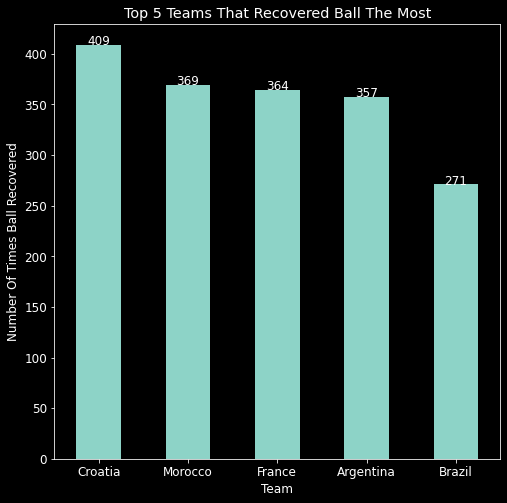

In [129]:
team_data.groupby('team').agg({'ball_recoveries':'sum'}).sort_values(by='ball_recoveries',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','ball_recoveries','sum')

plt.title('Top 5 Teams That Recovered Ball The Most')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Times Ball Recovered')

Text(0, 0.5, 'Number Of Aerial Balls Won')

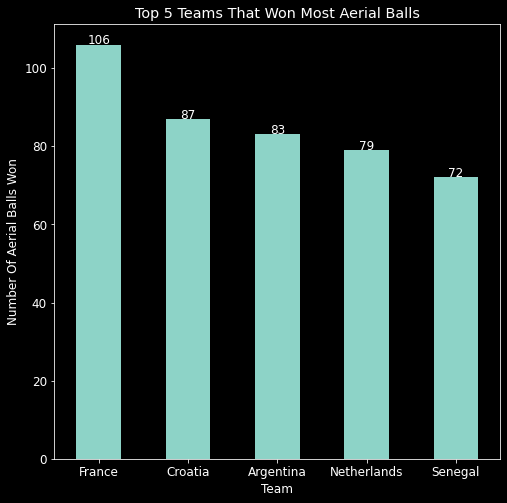

In [132]:
team_data.groupby('team').agg({'aerials_won':'sum'}).sort_values(by='aerials_won',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','aerials_won','sum')

plt.title('Top 5 Teams That Won Most Aerial Balls')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Aerial Balls Won')

Text(0, 0.5, 'Number Of Aerial Balls Lost')

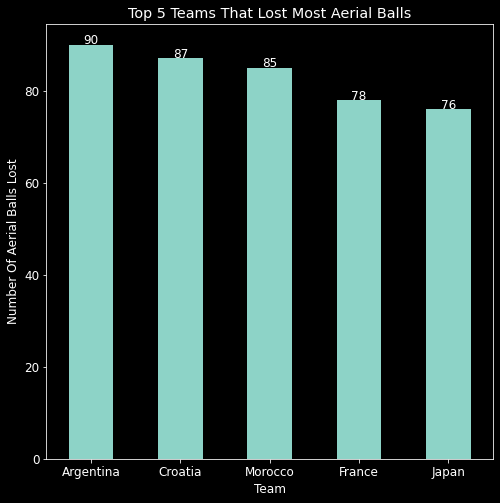

In [133]:
team_data.groupby('team').agg({'aerials_lost':'sum'}).sort_values(by='aerials_lost',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','aerials_lost','sum')

plt.title('Top 5 Teams That Lost Most Aerial Balls')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Aerial Balls Lost')

Text(0, 0.5, 'Number Of Fouls Committed')

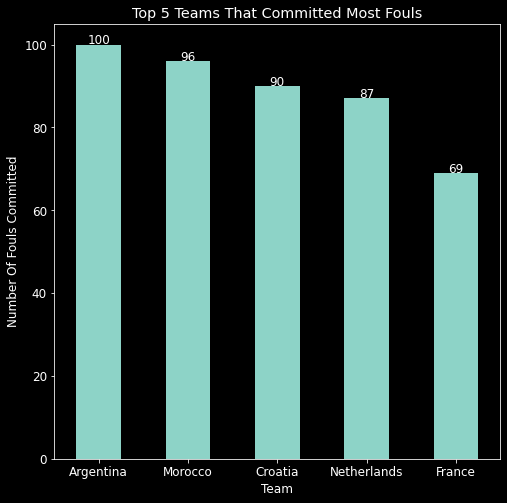

In [134]:
team_data.groupby('team').agg({'fouls':'sum'}).sort_values(by='fouls',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','fouls','sum')

plt.title('Top 5 Teams That Committed Most Fouls')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Fouls Committed')

Text(0, 0.5, 'Number Of Fouls Won')

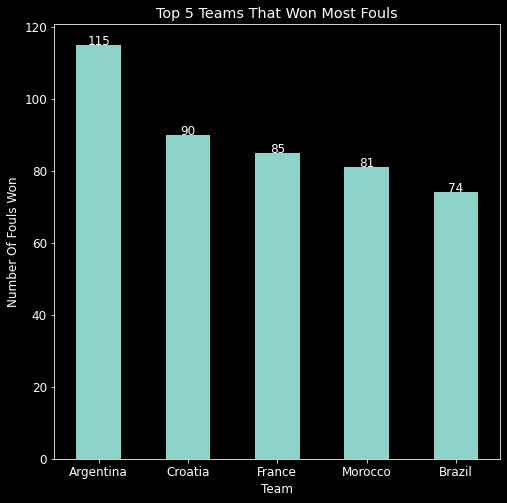

In [135]:
team_data.groupby('team').agg({'fouled':'sum'}).sort_values(by='fouled',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','fouled','sum')

plt.title('Top 5 Teams That Won Most Fouls')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Fouls Won')

Text(0, 0.5, 'Number Of Blocked Shots')

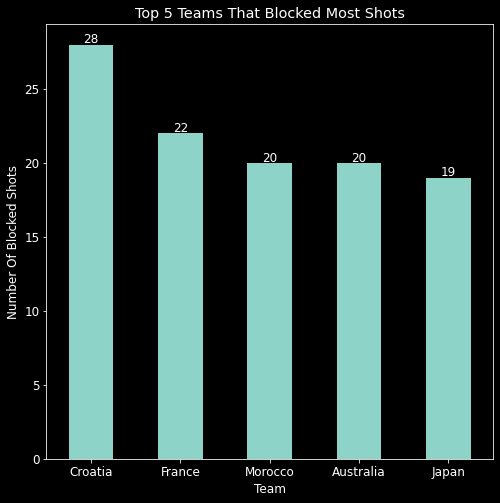

In [136]:
team_data.groupby('team').agg({'blocked_shots':'sum'}).sort_values(by='blocked_shots',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','blocked_shots','sum')

plt.title('Top 5 Teams That Blocked Most Shots')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Blocked Shots')

Text(0, 0.5, 'Number Of Blocked Passes')

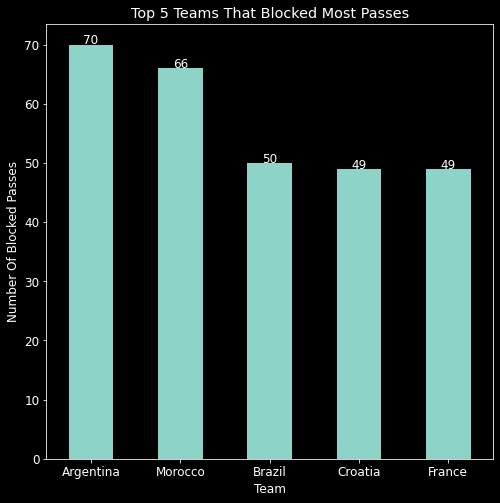

In [137]:
team_data.groupby('team').agg({'blocked_passes':'sum'}).sort_values(by='blocked_passes',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','blocked_passes','sum')

plt.title('Top 5 Teams That Blocked Most Passes')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Blocked Passes')

Text(0, 0.5, 'Number Of Interceptions')

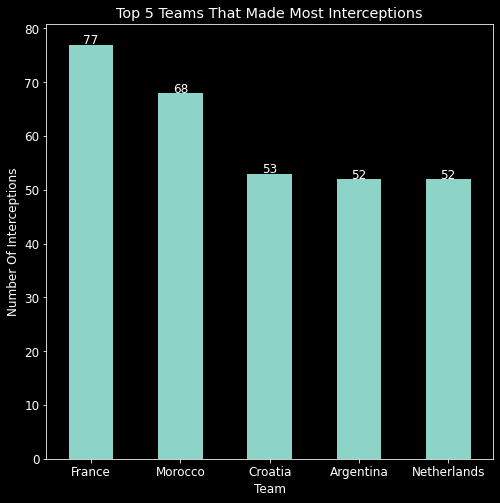

In [138]:
team_data.groupby('team').agg({'interceptions':'sum'}).sort_values(by='interceptions',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','interceptions','sum')

plt.title('Top 5 Teams That Made Most Interceptions')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('Number Of Interceptions')

Text(0, 0.5, 'gk_save_pct')

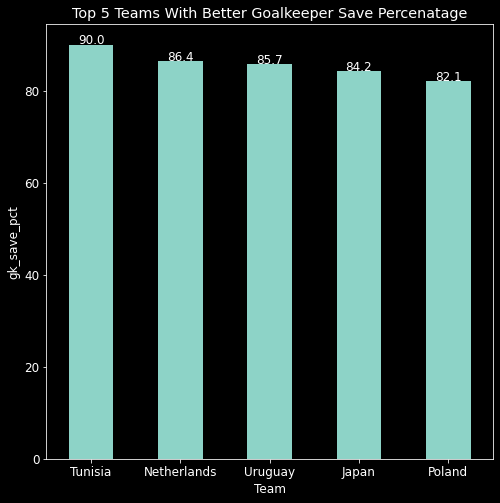

In [139]:
#gk_save_pct	
team_data.groupby('team').agg({'gk_save_pct':'sum'}).sort_values(by='gk_save_pct',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','gk_save_pct','sum')

plt.title('Top 5 Teams With Better Goalkeeper Save Percenatage')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('gk_save_pct')

Text(0, 0.5, 'passes_into_final_third')

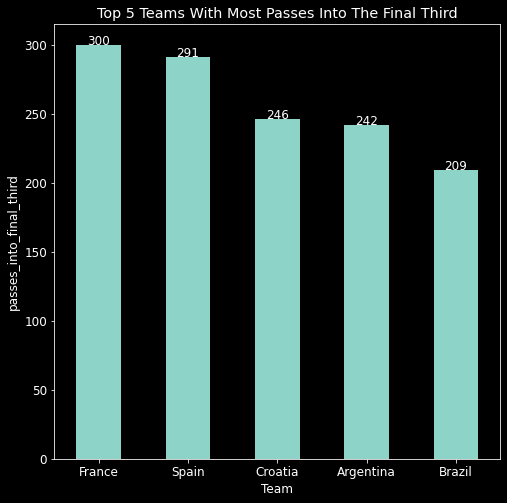

In [140]:
#passes_into_final_third
team_data.groupby('team').agg({'passes_into_final_third':'sum'}).sort_values(by='passes_into_final_third',ascending=False)[:5].plot(figsize=(8,8),kind='bar',legend=False)

add_labels_team_data('team','passes_into_final_third','sum')

plt.title('Top 5 Teams With Most Passes Into The Final Third')
plt.xlabel('Team')
plt.xticks(rotation='horizontal')
plt.ylabel('passes_into_final_third')